# Titanic Data from kaggle 

# Training Dataset

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# import warnings
import warnings
warnings.filterwarnings("ignore")

# label encoding 
from sklearn import preprocessing

# scaling data
from sklearn.preprocessing import StandardScaler

# train test split
from sklearn.model_selection import train_test_split

# Evaluation matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# models
from sklearn.linear_model import LogisticRegression
from sklearn import metrics # for AUC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import VotingClassifier

#importing pickle for saving model
import pickle

In [2]:
train_df=pd.read_csv(r'C:\Users\VISHAL\Web Deployment\Titanic\data\train.csv',index_col=0,header=0)
print(train_df.shape)
train_df.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df=train_df[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked','Survived']]

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
train_df.describe(include='all')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891.000000
unique,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN
top,NaN,"Mallet, Mr. Albert",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN
freq,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN
mean,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.383838
std,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.486592
min,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.000000


In [6]:
train_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

## Data Preprocessing

In [7]:
train_df.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin'],axis=1,inplace=True)

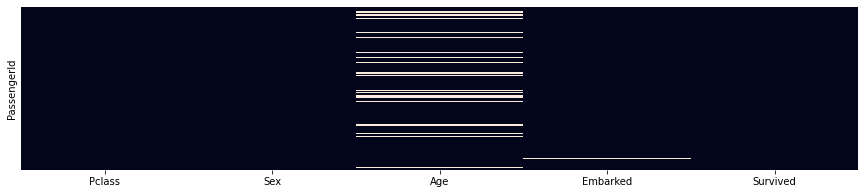

Pclass        0
Sex           0
Age         177
Embarked      2
Survived      0
dtype: int64


In [8]:
plt.figure(figsize=(15,3))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)
plt.show()
print(train_df.isnull().sum())

In [9]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)

In [10]:
train_df.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
Survived    0
dtype: int64

## Pre-processing

In [11]:
# For preprocessing the data
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

col=['Sex','Embarked']
for x in col:
    train_df[x]=le.fit_transform(train_df[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Sex
mapping {'female': 0, 'male': 1}
Feature Embarked
mapping {'C': 0, 'Q': 1, 'S': 2}


In [12]:
train_df.head()

,Pclass,Sex,Age,Embarked,Survived
PassengerId,,,,,
1,3,1,22.0,2,0
2,1,0,38.0,0,1
3,3,0,26.0,2,1
4,1,0,35.0,2,1
5,3,1,35.0,2,0


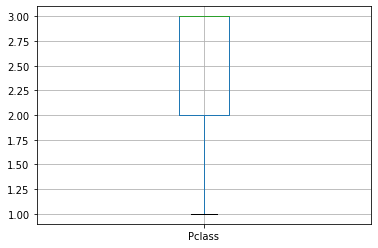

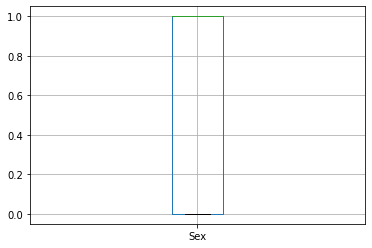

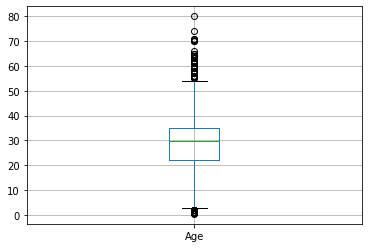

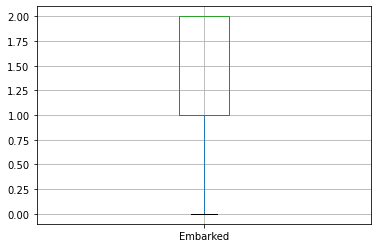

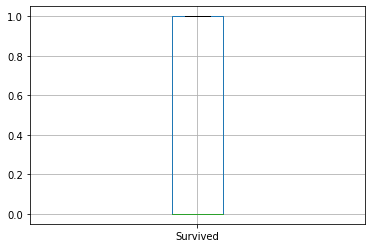

In [13]:
for i in train_df.columns:
    train_df.boxplot(column=i)
    plt.show()

In [14]:
train_df.dtypes

Pclass        int64
Sex           int32
Age         float64
Embarked      int32
Survived      int64
dtype: object

## Creating X and Y

In [15]:
X = train_df.iloc[:,0:-1]
Y = train_df.iloc[:,-1]

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[ 0.82737724  0.73769513 -0.5924806   0.58595414]
 [-1.56610693 -1.35557354  0.63878901 -1.9423032 ]
 [ 0.82737724 -1.35557354 -0.2846632   0.58595414]
 ...
 [ 0.82737724 -1.35557354  0.          0.58595414]
 [-1.56610693  0.73769513 -0.2846632  -1.9423032 ]
 [ 0.82737724  0.73769513  0.17706291 -0.67817453]]


## Splitting Data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

## Scaling Data

In [18]:
scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[ 8.27377244e-01  7.37695132e-01 -5.92480600e-01  5.85954143e-01]
 [-1.56610693e+00 -1.35557354e+00  6.38789012e-01 -1.94230320e+00]
 [ 8.27377244e-01 -1.35557354e+00 -2.84663197e-01  5.85954143e-01]
 ...
 [ 8.27377244e-01 -1.35557354e+00 -2.23290646e-16  5.85954143e-01]
 [-1.56610693e+00  7.37695132e-01 -2.84663197e-01 -1.94230320e+00]
 [ 8.27377244e-01  7.37695132e-01  1.77062908e-01 -6.78174528e-01]]


## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

# print(list(zip(train_df.columns[:-1],classifier.coef_.ravel())))

[(0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1),

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[101  16]
 [ 14  48]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       117
           1       0.75      0.77      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Accuracy of the model:  0.8324022346368715


## Logistic Tune Model

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [22]:
from sklearn.linear_model import LogisticRegression
classifier_tune=LogisticRegression()

classifier_tune.fit(X_train,Y_train)

Y_pred=classifier_tune.predict(X_test)
print(list(zip(Y_test,Y_pred)))

# print(list(zip(train_df.columns[:-1],classifier.coef_.ravel())))

[(0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1),

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[101  16]
 [ 14  48]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       117
           1       0.75      0.77      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Accuracy of the model:  0.8324022346368715


In [24]:
# store the predicted probabilities
y_pred_prob = classifier_tune.predict_proba(X_test)
print(y_pred_prob)

[[0.92437573 0.07562427]
 [0.8925655  0.1074345 ]
 [0.90650323 0.09349677]
 [0.09695126 0.90304874]
 [0.11138409 0.88861591]
 [0.89007203 0.10992797]
 [0.90429856 0.09570144]
 [0.85415231 0.14584769]
 [0.91879728 0.08120272]
 [0.89740349 0.10259651]
 [0.76874411 0.23125589]
 [0.0689675  0.9310325 ]
 [0.21162727 0.78837273]
 [0.56893391 0.43106609]
 [0.78654088 0.21345912]
 [0.78954679 0.21045321]
 [0.9142673  0.0857327 ]
 [0.79115195 0.20884805]
 [0.43912596 0.56087404]
 [0.83478771 0.16521229]
 [0.9142673  0.0857327 ]
 [0.67643746 0.32356254]
 [0.26771511 0.73228489]
 [0.90429856 0.09570144]
 [0.75742297 0.24257703]
 [0.8925655  0.1074345 ]
 [0.8925655  0.1074345 ]
 [0.40515493 0.59484507]
 [0.869467   0.130533  ]
 [0.06029037 0.93970963]
 [0.11138409 0.88861591]
 [0.78954679 0.21045321]
 [0.34732172 0.65267828]
 [0.92789695 0.07210305]
 [0.29409114 0.70590886]
 [0.9142673  0.0857327 ]
 [0.43279624 0.56720376]
 [0.50052283 0.49947717]
 [0.88010421 0.11989579]
 [0.91879728 0.08120272]


In [25]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 33  , type 2 error : 11  , type 1 error: 22
Errors at threshold  0.41000000000000003 : 33  , type 2 error : 11  , type 1 error: 22
Errors at threshold  0.42000000000000004 : 33  , type 2 error : 11  , type 1 error: 22
Errors at threshold  0.43000000000000005 : 33  , type 2 error : 11  , type 1 error: 22
Errors at threshold  0.44000000000000006 : 30  , type 2 error : 12  , type 1 error: 18
Errors at threshold  0.45000000000000007 : 29  , type 2 error : 12  , type 1 error: 17
Errors at threshold  0.4600000000000001 : 29  , type 2 error : 12  , type 1 error: 17
Errors at threshold  0.4700000000000001 : 29  , type 2 error : 12  , type 1 error: 17
Errors at threshold  0.4800000000000001 : 29  , type 2 error : 12  , type 1 error: 17
Errors at threshold  0.4900000000000001 : 29  , type 2 error : 12  , type 1 error: 17
Errors at threshold  0.5000000000000001 : 30  , type 2 error : 14  , type 1 error: 16
Errors at threshold  0.5100000000000001 : 31  , type 2 error : 1

In [26]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.49:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1]


In [27]:
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[100  17]
 [ 12  50]]
Accuracy of the model:  0.8379888268156425
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       117
           1       0.75      0.81      0.78        62

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.84      0.84       179



In [28]:
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)

print(auc)

0.8744830438378826


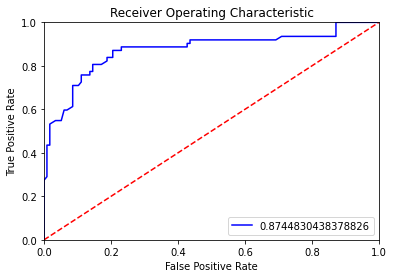

In [29]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## SGD Classifier

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [31]:
classifier_SGD=SGDClassifier(loss="log",random_state=10,alpha=0.01,max_iter=1000, shuffle=True,
                             early_stopping=True,n_iter_no_change=3)

classifier_SGD.fit(X_train,Y_train)

Y_pred=classifier_SGD.predict(X_test)

print(list(zip(train_df.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)

[('Pclass', -0.8729473869832564), ('Sex', -1.1898311307101228), ('Age', -0.33450374220406914), ('Embarked', -0.2954376518758036)]
[-0.59378625]


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[101  16]
 [ 14  48]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       117
           1       0.75      0.77      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Accuracy of the model:  0.8324022346368715


## Tune SGD

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [34]:
classifier_SGD_tune=SGDClassifier(loss="log",random_state=10,alpha=0.01,max_iter=10, shuffle=True,
                             early_stopping=True, n_iter_no_change=15)
classifier_SGD_tune.fit(X_train,Y_train)

Y_pred=classifier_SGD_tune.predict(X_test)

print(list(zip(train_df.columns[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)

[('Pclass', -0.8729473869832564), ('Sex', -1.1898311307101228), ('Age', -0.33450374220406914), ('Embarked', -0.2954376518758036)]
[-0.59378625]


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[101  16]
 [ 13  49]]
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       117
           1       0.75      0.79      0.77        62

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.84      0.84       179

Accuracy of the model:  0.8379888268156425


In [36]:
classifier_SGD.n_iter_

4

In [37]:
# store the predicted probabilities
y_pred_prob = classifier_SGD_tune.predict_proba(X_test)
print(y_pred_prob)

[[0.91296123 0.08703877]
 [0.8803282  0.1196718 ]
 [0.89449122 0.10550878]
 [0.10474733 0.89525267]
 [0.12084404 0.87915596]
 [0.87781382 0.12218618]
 [0.89223799 0.10776201]
 [0.84057056 0.15942944]
 [0.90715485 0.09284515]
 [0.88522297 0.11477703]
 [0.75806668 0.24193332]
 [0.07764506 0.92235494]
 [0.218753   0.781247  ]
 [0.56992857 0.43007143]
 [0.77499291 0.22500709]
 [0.77786338 0.22213662]
 [0.90246837 0.09753163]
 [0.77980531 0.22019469]
 [0.43104316 0.56895684]
 [0.82051492 0.17948508]
 [0.90246837 0.09753163]
 [0.66756167 0.33243833]
 [0.27108795 0.72891205]
 [0.89223799 0.10776201]
 [0.74602932 0.25397068]
 [0.8803282  0.1196718 ]
 [0.8803282  0.1196718 ]
 [0.41913957 0.58086043]
 [0.85578889 0.14421111]
 [0.06794971 0.93205029]
 [0.12084404 0.87915596]
 [0.77786338 0.22213662]
 [0.34696784 0.65303216]
 [0.91664763 0.08335237]
 [0.29594419 0.70405581]
 [0.90246837 0.09753163]
 [0.42525205 0.57474795]
 [0.50712237 0.49287763]
 [0.86673556 0.13326444]
 [0.90715485 0.09284515]


In [38]:
for a in np.arange(0.3,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.3 : 34  , type 2 error : 7  , type 1 error: 27
Errors at threshold  0.31 : 34  , type 2 error : 7  , type 1 error: 27
Errors at threshold  0.32 : 34  , type 2 error : 7  , type 1 error: 27
Errors at threshold  0.33 : 35  , type 2 error : 8  , type 1 error: 27
Errors at threshold  0.34 : 33  , type 2 error : 8  , type 1 error: 25
Errors at threshold  0.35000000000000003 : 34  , type 2 error : 10  , type 1 error: 24
Errors at threshold  0.36000000000000004 : 34  , type 2 error : 10  , type 1 error: 24
Errors at threshold  0.37000000000000005 : 33  , type 2 error : 10  , type 1 error: 23
Errors at threshold  0.38000000000000006 : 32  , type 2 error : 10  , type 1 error: 22
Errors at threshold  0.39000000000000007 : 33  , type 2 error : 11  , type 1 error: 22
Errors at threshold  0.4000000000000001 : 33  , type 2 error : 11  , type 1 error: 22
Errors at threshold  0.4100000000000001 : 33  , type 2 error : 11  , type 1 error: 22
Errors at threshold  0.4200000000000001

In [39]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.49:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1]


In [40]:
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[100  17]
 [ 12  50]]
Accuracy of the model:  0.8379888268156425
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       117
           1       0.75      0.81      0.78        62

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.84      0.84       179



## KNN

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [42]:
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean')

model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)

In [43]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[111   6]
 [ 25  37]]
0.8268156424581006
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       117
           1       0.86      0.60      0.70        62

    accuracy                           0.83       179
   macro avg       0.84      0.77      0.79       179
weighted avg       0.83      0.83      0.82       179



## Tune KNN

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [45]:
model_KNN_tune=KNeighborsClassifier(n_neighbors=8, metric='euclidean')

model_KNN_tune.fit(X_train,Y_train)

Y_pred=model_KNN_tune.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[109   8]
 [ 20  42]]
0.8435754189944135
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       117
           1       0.84      0.68      0.75        62

    accuracy                           0.84       179
   macro avg       0.84      0.80      0.82       179
weighted avg       0.84      0.84      0.84       179



In [47]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,31):
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="minkowski")
    model_KNN.fit(X_train, Y_train) 
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

Accuracy is  0.7374301675977654 for K-Value: 1
Accuracy is  0.8212290502793296 for K-Value: 2
Accuracy is  0.7541899441340782 for K-Value: 3
Accuracy is  0.8324022346368715 for K-Value: 4
Accuracy is  0.8379888268156425 for K-Value: 5
Accuracy is  0.8379888268156425 for K-Value: 6
Accuracy is  0.8435754189944135 for K-Value: 7
Accuracy is  0.8435754189944135 for K-Value: 8
Accuracy is  0.8379888268156425 for K-Value: 9
Accuracy is  0.8379888268156425 for K-Value: 10
Accuracy is  0.8324022346368715 for K-Value: 11
Accuracy is  0.8268156424581006 for K-Value: 12
Accuracy is  0.8268156424581006 for K-Value: 13
Accuracy is  0.8156424581005587 for K-Value: 14
Accuracy is  0.8268156424581006 for K-Value: 15
Accuracy is  0.8156424581005587 for K-Value: 16
Accuracy is  0.8156424581005587 for K-Value: 17
Accuracy is  0.8156424581005587 for K-Value: 18
Accuracy is  0.8156424581005587 for K-Value: 19
Accuracy is  0.8156424581005587 for K-Value: 20
Accuracy is  0.8156424581005587 for K-Value: 21
A

In [48]:
for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print(k,":",my_dict[k])

7 : 0.8435754189944135
8 : 0.8435754189944135


## Decision Tree

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [50]:
model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")

model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0]


In [51]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[105  12]
 [ 14  48]]
0.8547486033519553
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       117
           1       0.80      0.77      0.79        62

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



## Tune Decision Tree

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [53]:
model_DecisionTree_tune=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best",
                                         min_samples_leaf=1,max_depth=None,min_samples_split=2,
                                         max_leaf_nodes=100)

model_DecisionTree_tune.fit(X_train,Y_train)

Y_pred=model_DecisionTree_tune.predict(X_test)
print(Y_pred)

[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0]


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[106  11]
 [ 14  48]]
0.8603351955307262
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       117
           1       0.81      0.77      0.79        62

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.86      0.86      0.86       179



In [55]:
model_DecisionTree.score(X_train,Y_train)

0.901685393258427

In [56]:
model_DecisionTree.score(X_test,Y_test)

0.8547486033519553

In [57]:
# store the predicted probabilities
y_pred_prob = model_DecisionTree_tune.predict_proba(X_test)
print(y_pred_prob)

[[0.9375     0.0625    ]
 [0.89583333 0.10416667]
 [0.85714286 0.14285714]
 [0.01408451 0.98591549]
 [0.01408451 0.98591549]
 [0.89583333 0.10416667]
 [0.85714286 0.14285714]
 [1.         0.        ]
 [0.77777778 0.22222222]
 [1.         0.        ]
 [0.94117647 0.05882353]
 [0.         1.        ]
 [0.16666667 0.83333333]
 [0.76470588 0.23529412]
 [0.94117647 0.05882353]
 [0.94117647 0.05882353]
 [0.89230769 0.10769231]
 [0.5        0.5       ]
 [1.         0.        ]
 [0.8125     0.1875    ]
 [0.89230769 0.10769231]
 [1.         0.        ]
 [0.         1.        ]
 [0.85714286 0.14285714]
 [0.         1.        ]
 [0.89583333 0.10416667]
 [0.89583333 0.10416667]
 [0.         1.        ]
 [1.         0.        ]
 [0.01408451 0.98591549]
 [0.01408451 0.98591549]
 [0.94117647 0.05882353]
 [1.         0.        ]
 [0.9375     0.0625    ]
 [0.         1.        ]
 [0.89230769 0.10769231]
 [0.         1.        ]
 [1.         0.        ]
 [0.89230769 0.10769231]
 [0.77777778 0.22222222]


In [58]:
for a in np.arange(0.3,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.3 : 34  , type 2 error : 12  , type 1 error: 22
Errors at threshold  0.31 : 34  , type 2 error : 12  , type 1 error: 22
Errors at threshold  0.32 : 34  , type 2 error : 12  , type 1 error: 22
Errors at threshold  0.33 : 34  , type 2 error : 12  , type 1 error: 22
Errors at threshold  0.34 : 34  , type 2 error : 12  , type 1 error: 22
Errors at threshold  0.35000000000000003 : 34  , type 2 error : 12  , type 1 error: 22
Errors at threshold  0.36000000000000004 : 33  , type 2 error : 12  , type 1 error: 21
Errors at threshold  0.37000000000000005 : 33  , type 2 error : 12  , type 1 error: 21
Errors at threshold  0.38000000000000006 : 33  , type 2 error : 12  , type 1 error: 21
Errors at threshold  0.39000000000000007 : 33  , type 2 error : 12  , type 1 error: 21
Errors at threshold  0.4000000000000001 : 33  , type 2 error : 13  , type 1 error: 20
Errors at threshold  0.4100000000000001 : 33  , type 2 error : 13  , type 1 error: 20
Errors at threshold  0.42000000000

## Random Forest

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [60]:
model_RandomForest=RandomForestClassifier(n_estimators=10, random_state=10)

model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [61]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[104  13]
 [ 15  47]]
0.8435754189944135
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       117
           1       0.78      0.76      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



## Tune Random Forest

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [63]:
model_RandomForest_tune=RandomForestClassifier(n_estimators=45, random_state=10)

model_RandomForest_tune.fit(X_train,Y_train)

Y_pred=model_RandomForest_tune.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[105  12]
 [ 14  48]]
0.8547486033519553
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       117
           1       0.80      0.77      0.79        62

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [65]:
# store the predicted probabilities
y_pred_prob = model_RandomForest_tune.predict_proba(X_test)
print(y_pred_prob)

[[1.         0.        ]
 [0.89761905 0.10238095]
 [0.86682941 0.13317059]
 [0.04444444 0.95555556]
 [0.         1.        ]
 [0.88763248 0.11236752]
 [0.87831329 0.12168671]
 [1.         0.        ]
 [0.81780423 0.18219577]
 [1.         0.        ]
 [1.         0.        ]
 [0.06666667 0.93333333]
 [0.24378307 0.75621693]
 [0.73579092 0.26420908]
 [0.91978836 0.08021164]
 [0.77328042 0.22671958]
 [0.88665554 0.11334446]
 [0.62444444 0.37555556]
 [0.64444444 0.35555556]
 [0.78429699 0.21570301]
 [0.88665554 0.11334446]
 [0.91481481 0.08518519]
 [0.         1.        ]
 [0.87831329 0.12168671]
 [0.29444444 0.70555556]
 [0.89761905 0.10238095]
 [0.89761905 0.10238095]
 [0.46666667 0.53333333]
 [0.98888889 0.01111111]
 [0.         1.        ]
 [0.         1.        ]
 [0.77328042 0.22671958]
 [1.         0.        ]
 [1.         0.        ]
 [0.13333333 0.86666667]
 [0.88665554 0.11334446]
 [0.05555556 0.94444444]
 [0.88518519 0.11481481]
 [0.91285734 0.08714266]
 [0.81780423 0.18219577]


In [66]:
for a in np.arange(0.3,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.3 : 34  , type 2 error : 12  , type 1 error: 22
Errors at threshold  0.31 : 34  , type 2 error : 12  , type 1 error: 22
Errors at threshold  0.32 : 33  , type 2 error : 12  , type 1 error: 21
Errors at threshold  0.33 : 33  , type 2 error : 12  , type 1 error: 21
Errors at threshold  0.34 : 32  , type 2 error : 12  , type 1 error: 20
Errors at threshold  0.35000000000000003 : 32  , type 2 error : 12  , type 1 error: 20
Errors at threshold  0.36000000000000004 : 30  , type 2 error : 12  , type 1 error: 18
Errors at threshold  0.37000000000000005 : 30  , type 2 error : 12  , type 1 error: 18
Errors at threshold  0.38000000000000006 : 29  , type 2 error : 12  , type 1 error: 17
Errors at threshold  0.39000000000000007 : 28  , type 2 error : 12  , type 1 error: 16
Errors at threshold  0.4000000000000001 : 28  , type 2 error : 13  , type 1 error: 15
Errors at threshold  0.4100000000000001 : 28  , type 2 error : 13  , type 1 error: 15
Errors at threshold  0.42000000000

In [67]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.46:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0]


In [68]:
print(confusion_matrix(Y_test,y_pred_class))
print(accuracy_score(Y_test,y_pred_class))
print(classification_report(Y_test,y_pred_class))

[[104  13]
 [ 13  49]]
0.8547486033519553
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       117
           1       0.79      0.79      0.79        62

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



## SVC

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [70]:
svc_model=svm.SVC(kernel='rbf',C=10.0,gamma=0.001)

svc_model.fit(X_train, Y_train)

Y_pred=svc_model.predict(X_test)

print(list(Y_pred))

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]


In [71]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[104  13]
 [ 19  43]]
0.8212290502793296
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.69      0.73        62

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



## Tune SVC

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [73]:
model_SVC_tune=svm.SVC(kernel="rbf", gamma=0.1, C=100)

model_SVC_tune.fit(X_train,Y_train)

Y_pred=model_SVC_tune.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[111   6]
 [ 20  42]]
0.8547486033519553
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       117
           1       0.88      0.68      0.76        62

    accuracy                           0.85       179
   macro avg       0.86      0.81      0.83       179
weighted avg       0.86      0.85      0.85       179



## Ensemble Modelling

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [76]:
estimators = []
# model1 = LogisticRegression()
# estimators.append(('log', model1))



model2=SGDClassifier(loss="log",random_state=10,alpha=0.01,max_iter=10, shuffle=True,
                     early_stopping=True, n_iter_no_change=15)
estimators.append(('sgd', model2))



# model3 = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
# estimators.append(('knn', model3))



# model4 = svm.SVC(kernel="rbf", gamma=0.1, C=100)
# estimators.append(('svm', model4))



model5 = DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best",min_samples_leaf=1,max_depth=None,
                                min_samples_split=2,max_leaf_nodes=100)
estimators.append(('cart', model5))



model6=RandomForestClassifier(n_estimators=45, random_state=10)
estimators.append(('rt', model6))



# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
print(Y_pred)

[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0]


In [77]:
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[107  10]
 [ 14  48]]
0.8659217877094972
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       117
           1       0.83      0.77      0.80        62

    accuracy                           0.87       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.87      0.86       179



# All operation on Testing Dataset

In [78]:
test_df=pd.read_csv(r'C:\Users\VISHAL\Web Deployment\Titanic\data\test.csv',index_col=0,header=0)
print(test_df.shape)
test_df.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Preprocessing

In [79]:
test_df.drop(['Name','SibSp','Parch','Fare','Ticket','Cabin'],axis=1,inplace=True)

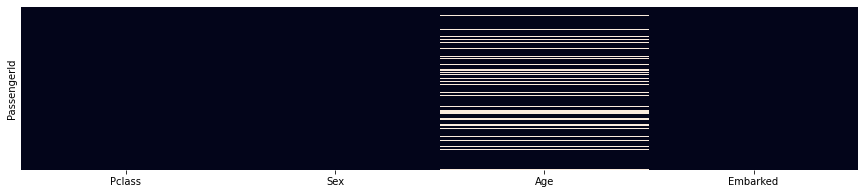

Pclass       0
Sex          0
Age         86
Embarked     0
dtype: int64


In [80]:
plt.figure(figsize=(15,3))
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)
plt.show()
print(test_df.isnull().sum())

In [81]:
test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)

In [82]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [83]:
# For preprocessing the data
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

col=['Sex','Embarked']
for x in col:
    test_df[x]=le.fit_transform(test_df[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Sex
mapping {'female': 0, 'male': 1}
Feature Embarked
mapping {'C': 0, 'Q': 1, 'S': 2}


In [84]:
test_df.head()

,Pclass,Sex,Age,Embarked
PassengerId,,,,
892,3,1,34.5,1
893,3,0,47.0,2
894,2,1,62.0,1
895,3,1,27.0,2
896,3,0,22.0,2


## Implementing model 

In [85]:
X_test_new  = test_df.values[:,:]

In [86]:
X_test_new = scaler.transform(X_test_new)
print(X)

[[ 8.27377244e-01  7.37695132e-01 -5.92480600e-01  5.85954143e-01]
 [-1.56610693e+00 -1.35557354e+00  6.38789012e-01 -1.94230320e+00]
 [ 8.27377244e-01 -1.35557354e+00 -2.84663197e-01  5.85954143e-01]
 ...
 [ 8.27377244e-01 -1.35557354e+00 -2.23290646e-16  5.85954143e-01]
 [-1.56610693e+00  7.37695132e-01 -2.84663197e-01 -1.94230320e+00]
 [ 8.27377244e-01  7.37695132e-01  1.77062908e-01 -6.78174528e-01]]


In [87]:
Y_pred_new=ensemble.predict(X_test_new)

In [88]:
print(Y_pred_new)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [89]:
print(Y_pred_new.shape) 

(418,)


In [90]:
df=pd.read_csv(r'C:\Users\VISHAL\Web Deployment\Titanic\data\gender_submission.csv',header=0)

In [91]:
df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0


In [92]:
df['Survived']=Y_pred_new

In [93]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [94]:
df.to_csv(r'C:\Users\VISHAL\Web Deployment\Titanic\data\gender_submission.csv',index=False,header=True)

## Dumping All Models

In [95]:
## saving model:
pickle.dump(classifier,open(r'C:\Users\VISHAL\Web Deployment\Titanic\models\log.pkl','wb'))
pickle.dump(classifier_SGD,open(r'C:\Users\VISHAL\Web Deployment\Titanic\models\sgd.pkl','wb'))
pickle.dump(classifier_SGD_tune,open(r'C:\Users\VISHAL\Web Deployment\Titanic\models\sgd_tune.pkl','wb'))
pickle.dump(model_KNN,open(r'C:\Users\VISHAL\Web Deployment\Titanic\models\knn.pkl','wb'))
pickle.dump(model_KNN_tune,open(r'C:\Users\VISHAL\Web Deployment\Titanic\models\knn_tune.pkl','wb'))
pickle.dump(svc_model,open(r'C:\Users\VISHAL\Web Deployment\Titanic\models\svc.pkl','wb'))
pickle.dump(model_SVC_tune,open(r'C:\Users\VISHAL\Web Deployment\Titanic\models\svc_tune.pkl','wb'))
pickle.dump(model_DecisionTree,open(r'C:\Users\VISHAL\Web Deployment\Titanic\models\dt.pkl','wb'))
pickle.dump(model_DecisionTree_tune,open(r'C:\Users\VISHAL\Web Deployment\Titanic\models\dt_tune.pkl','wb'))
pickle.dump(model_RandomForest,open(r'C:\Users\VISHAL\Web Deployment\Titanic\models\rt.pkl','wb'))
pickle.dump(model_RandomForest_tune,open(r'C:\Users\VISHAL\Web Deployment\Titanic\models\rt_tune.pkl','wb'))
pickle.dump(ensemble,open(r'C:\Users\VISHAL\Web Deployment\Titanic\models\ensemble.pkl','wb'))